## Zadanie 1

#### Wczytanie bibliotek:

In [24]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from scipy.stats import linregress
from pandas.plotting import scatter_matrix
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.linear_model import Lasso
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
from scipy.optimize import minimize

#### Wczytanie danych z plików xlsx:

In [2]:
users = pd.read_excel("E://INFORMATYKA//MED//Lab1//dane//users.xlsx")
FBinfo = pd.read_excel("E://INFORMATYKA//MED//Lab1//dane//FBinfo.xlsx")

#### Sprawdzenie danych w tabelach (pierwsze 4 wierszy):

In [59]:
print(users.head())

   rok   kwartal  liczba_uzytkownikow_mln
0  2008        1                      NaN
1  2008        2                      NaN
2  2008        3                    100.0
3  2008        4                      NaN
4  2009        1                    197.0


In [60]:
print(FBinfo.head())

    rok  przychod_w_mln  zysk_w_mln  zatrudnienie
0  2007             153        -138           450
1  2008             272         -56           850
2  2009             777         229          1218
3  2010            1974         606          2127
4  2011            3711        1000          3200


#### Złączenie tabel w jedną wspólną:

In [3]:
# uznanie wartosci z kwartalu 3 za wartosc z roku 2008 oraz przedstawienie wynikow z konca roku
users.iloc[3] = users.iloc[2]
users = users[3::4] 

users = users.reset_index(drop=True)

# usuniecie roku 2007 aby moc zcalic dane
FBinfo1 = FBinfo.drop(0)
# reset indeksu
FBinfo1 = FBinfo1.reset_index(drop=True)
data = FBinfo1
# dodanie kolumny z liczba uzytkownikow do danych
data["liczba_uzytkownikow_mln"] = users["liczba_uzytkownikow_mln"] 

data

,rok,przychod_w_mln,zysk_w_mln,zatrudnienie,liczba_uzytkownikow_mln
0,2008,272,-56,850,100.0
1,2009,777,229,1218,360.0
2,2010,1974,606,2127,608.0
3,2011,3711,1000,3200,845.0
4,2012,5089,53,4619,1056.0
5,2013,7872,1500,6337,1228.0
6,2014,12466,2940,9199,1393.0
7,2015,17928,3688,12691,1591.0
8,2016,27638,10217,17048,1860.0
9,2017,40653,15934,25105,2129.0


#### Macierz naszej tabeli ze wszystkimi danymi:

array([[<Axes: xlabel='rok', ylabel='rok'>,
        <Axes: xlabel='przychod_w_mln', ylabel='rok'>,
        <Axes: xlabel='zysk_w_mln', ylabel='rok'>,
        <Axes: xlabel='zatrudnienie', ylabel='rok'>,
        <Axes: xlabel='liczba_uzytkownikow_mln', ylabel='rok'>],
       [<Axes: xlabel='rok', ylabel='przychod_w_mln'>,
        <Axes: xlabel='przychod_w_mln', ylabel='przychod_w_mln'>,
        <Axes: xlabel='zysk_w_mln', ylabel='przychod_w_mln'>,
        <Axes: xlabel='zatrudnienie', ylabel='przychod_w_mln'>,
        <Axes: xlabel='liczba_uzytkownikow_mln', ylabel='przychod_w_mln'>],
       [<Axes: xlabel='rok', ylabel='zysk_w_mln'>,
        <Axes: xlabel='przychod_w_mln', ylabel='zysk_w_mln'>,
        <Axes: xlabel='zysk_w_mln', ylabel='zysk_w_mln'>,
        <Axes: xlabel='zatrudnienie', ylabel='zysk_w_mln'>,
        <Axes: xlabel='liczba_uzytkownikow_mln', ylabel='zysk_w_mln'>],
       [<Axes: xlabel='rok', ylabel='zatrudnienie'>,
        <Axes: xlabel='przychod_w_mln', ylabel='zatru

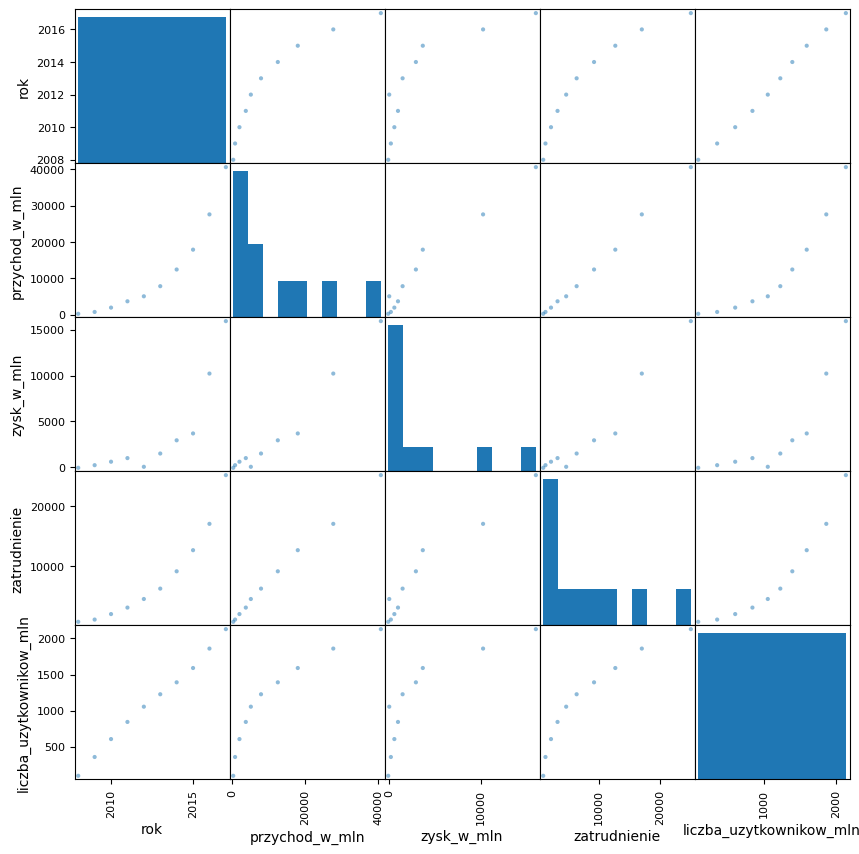

In [6]:
scatter_matrix(data, figsize=(10, 10))

Z macierzy możemy wyczytać na pierwszy rzut oka, że występują głównie dwa rozkłady w naszych danych - liniowy oraz wykładniczy.

In [25]:

def calculate_weights_optimization(y_true, predictions):
    
    n_models = len(predictions)
    
    # Funkcja celu: minimalizacja błędu średniokwadratowego (MSE)
    def objective(weights):
        combined_pred = sum(w * pred for w, pred in zip(weights, predictions))
        return np.mean((y_true - combined_pred) ** 2)
    
    # Ograniczenia: suma wag = 1
    constraints = [{'type': 'eq', 'fun': lambda w: sum(w) - 1}]
    
    # Ograniczenia: każda waga >= 0
    bounds = [(0, 1)] * n_models
    
    # Inicjalizacja wag: równe wagi początkowe
    initial_weights = [1 / n_models] * n_models
    
    # Optymalizacja
    result = minimize(objective, initial_weights, bounds=bounds, constraints=constraints)
    
    return result.x

Omówmy teraz wykresy, które są zawarte w pytaniach badawczych:

### Wykres 1. Zależność przychodów od liczby użytkowników w latach 2008-2017

Zoptymalizowane wagi: [0.49571212 0.50428788]


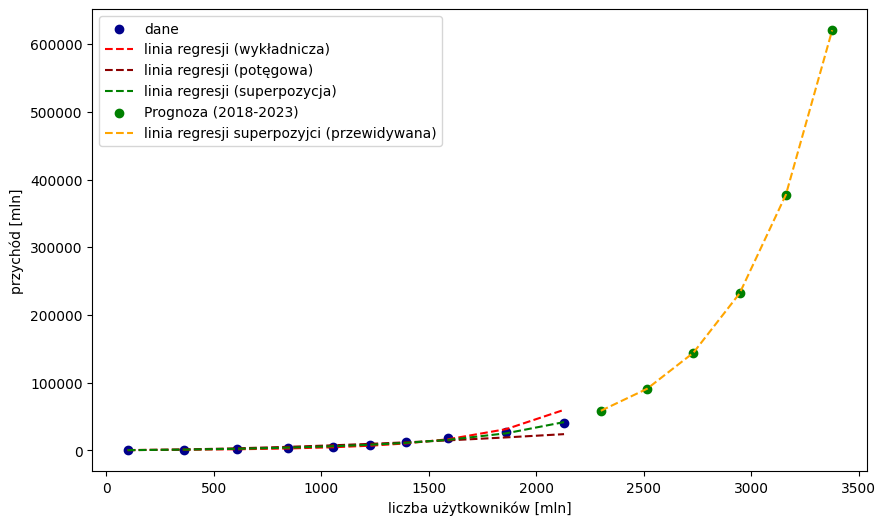


Model wykładniczy (OLS):
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.967
Method:                 Least Squares   F-statistic:                     263.5
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           2.09e-07
Time:                        22:59:07   Log-Likelihood:               -0.70157
No. Observations:                  10   AIC:                             5.403
Df Residuals:                       8   BIC:                             6.008
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.8767     

c:\Users\Domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [26]:
x1 = np.array(data["liczba_uzytkownikow_mln"]).reshape(-1,1)
y1 = np.array(data["przychod_w_mln"]).reshape(-1,1)

y1_log = np.log(y1)
x1_log = np.log(x1)

# model wykladniczy
modelexp1 = LinearRegression()
modelexp1.fit(x1,y1_log)
y1_pred_log = modelexp1.predict(x1)
y1_pred_exp = np.exp(y1_pred_log)

# model potegowy
modelpotegowy1 = LinearRegression()
modelpotegowy1.fit(x1_log,y1_log)
y1_pred_logpot = modelpotegowy1.predict(x1_log)
y1_pred_potegowy = np.exp(y1_pred_logpot)

# Lista przewidywań dla różnych modeli
predictions = [y1_pred_exp, y1_pred_potegowy]

# Obliczanie wag za pomocą optymalizacji
weights_opt = calculate_weights_optimization(y1, predictions)
print("Zoptymalizowane wagi:", weights_opt)

# Finalna prognoza
y1_fin = sum(w * pred for w, pred in zip(weights_opt, predictions))

x_future = [
    [2300.06666667],
    [2515.16969697],
    [2730.27272727],
    [2945.37575758],
    [3160.47878788],
    [3375.58181818]
]

# Prognoza wykładnicza dla przyszłych lat
y1_pred_log_future_exp = modelexp1.predict(x_future)
y1_pred_future_exp = np.exp(y1_pred_log_future_exp)

# Prognoza potęgowa dla przyszłych lat
x1_future_log = np.log(x_future)
y1_pred_log_future_pot = modelpotegowy1.predict(x1_future_log)
y1_pred_future_pot = np.exp(y1_pred_log_future_pot)

# Finalna prognoza dla przyszłych lat
y1_pred_future = sum(w * pred for w, pred in zip(weights_opt, [y1_pred_future_exp, y1_pred_future_pot]))

plt.figure(figsize=(10,6))
plt.scatter(x1, y1, color = 'darkblue', label = "dane")
plt.plot(x1, y1_pred_exp, color = 'red', label = "linia regresji (wykładnicza)", linestyle= "dashed")
plt.plot(x1, y1_pred_potegowy, color = 'darkred', label = "linia regresji (potęgowa)", linestyle= "dashed")
plt.plot(x1, y1_fin, color = 'green', label = "linia regresji (superpozycja)", linestyle= "dashed")
plt.scatter(x_future, y1_pred_future, color = 'green', label = "Prognoza (2018-2023)")
plt.plot(x_future, y1_pred_future, color = 'orange', label = "linia regresji superpozyjci (przewidywana)", linestyle= "dashed")
plt.xlabel("liczba użytkowników [mln]")
plt.ylabel("przychód [mln]")
plt.legend()
plt.show()

# Dodanie stałej (intercept) do modelu dla statsmodels
x1 = sm.add_constant(x1)
x1_log = sm.add_constant(x1_log)

# Regresja wykładnicza za pomocą OLS
modelexp_OLS = sm.OLS(y1_log, x1).fit()

# Regresja potęgowa za pomocą OLS
modelpotegowy_OLS = sm.OLS(y1_log, x1_log).fit()

# Regresja superpozycji (na podstawie finalnej prognozy)
model_fin_OLS = sm.OLS(y1, x1).fit()

# Wyświetlanie wyników regresji OLS
print("\nModel wykładniczy (OLS):")
print(modelexp_OLS.summary())

print("\nModel potęgowy (OLS):")
print(modelpotegowy_OLS.summary())

print("\nModel superpozycji (OLS):")
print(model_fin_OLS.summary())

### Wykres 2. Przychód w latach 2007-2017 wraz z predykcją

Zoptymalizowane wagi: [0.5 0.5]


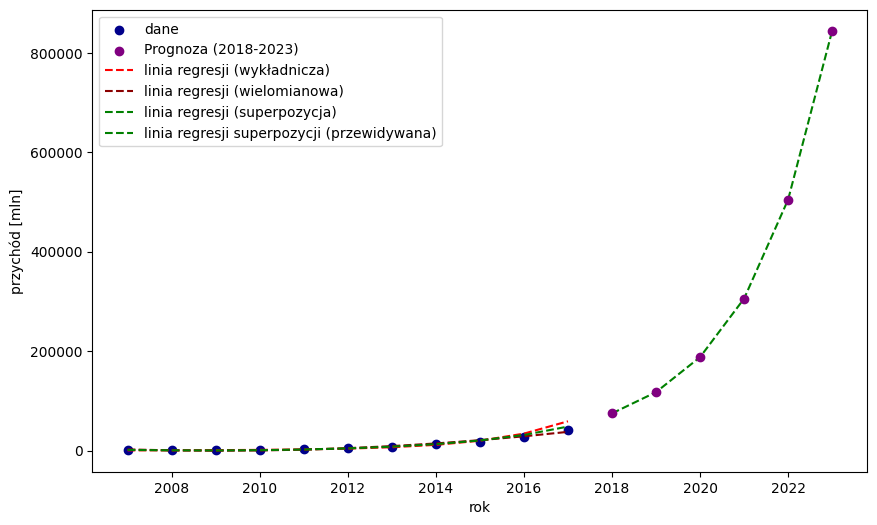

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.965
Model:                            OLS   Adj. R-squared:                  0.961
Method:                 Least Squares   F-statistic:                     245.7
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           7.69e-08
Time:                        23:02:04   Log-Likelihood:                -3.4619
No. Observations:                  11   AIC:                             10.92
Df Residuals:                       9   BIC:                             11.72
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1093.7931     70.300    -15.559      0.0

c:\Users\Domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)
c:\Users\Domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=11 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [27]:
x3 = np.array(FBinfo["rok"]).reshape(-1,1)
y3 = np.array(FBinfo["przychod_w_mln"]).reshape(-1,1)

y3_log = np.log(y3)
x3_log = np.log(x3)

# model wykladniczy
modelexp3 = LinearRegression()
modelexp3.fit(x3,y3_log)
y3_pred_log = modelexp3.predict(x3)
y3_pred_exp = np.exp(y3_pred_log)

# model wielomianowy (np. stopnia 2)
poly = PolynomialFeatures(degree=2)
x3_poly = poly.fit_transform(x3)  # Przekształcamy dane do formy wielomianowej
model_poly3 = LinearRegression()
model_poly3.fit(x3_poly, y3)
y3_pred_poly = model_poly3.predict(x3_poly)

# Lista przewidywań dla różnych modeli
predictions = [y3_pred_exp, y3_pred_poly]

# Obliczanie wag za pomocą optymalizacji
weights_opt = calculate_weights_optimization(y3, predictions)
print("Zoptymalizowane wagi:", weights_opt)

# Finalna prognoza
y3_fin = sum(w * pred for w, pred in zip(weights_opt, predictions))

# Prognoza na lata 2018-2023 dla superpozycji
years_to_predict = np.array([[2018], [2019], [2020], [2021], [2022], [2023]])

# Prognoza wykładnicza dla przyszłych lat
y3_pred_log_future = modelexp3.predict(years_to_predict)
y3_pred_exp_future = np.exp(y3_pred_log_future)

# Prognoza wielomianowa dla przyszłych lat
x3_poly_future = poly.transform(years_to_predict)
y3_pred_poly_future = model_poly3.predict(x3_poly_future)

# Finalna prognoza (superpozycja) dla przyszłych lat
y3_pred_fin_future = sum(w * pred for w, pred in zip(weights_opt, [y3_pred_exp_future, y3_pred_poly_future]))


plt.figure(figsize=(10,6))
plt.scatter(x3, y3, color = 'darkblue', label = "dane")
plt.scatter(years_to_predict, y3_pred_fin_future, color='purple', label="Prognoza (2018-2023)", zorder=5)
plt.plot(x3, y3_pred_exp, color = 'red', label = "linia regresji (wykładnicza)", linestyle= "dashed")
plt.plot(x3, y3_pred_poly, color = 'darkred', label = "linia regresji (wielomianowa)", linestyle= "dashed")
plt.plot(x3, y3_fin, color='green', label="linia regresji (superpozycja)", linestyle="dashed")
plt.plot(years_to_predict, y3_pred_fin_future, color='green', label="linia regresji superpozycji (przewidywana)", linestyle="dashed")
plt.xlabel("rok")
plt.ylabel("przychód [mln]")
plt.legend()
plt.show()

# OLS wykładniczego:
x3 = sm.add_constant(x3)
modelexp3_OLS = sm.OLS(y3_log, x3).fit()
print(modelexp3_OLS.summary())

# OLS wielomianowego:
x3_poly = poly.fit_transform(x3)
model_poly3_OLS = sm.OLS(y3, x3_poly).fit()
print(model_poly3_OLS.summary())

# OLS superpozycji:
model_fin_OLS = sm.OLS(y3, x3).fit()
print(model_fin_OLS.summary())


### Wykres 3. Liczba użytkowników w latach 2008-2017 wraz z predykcją

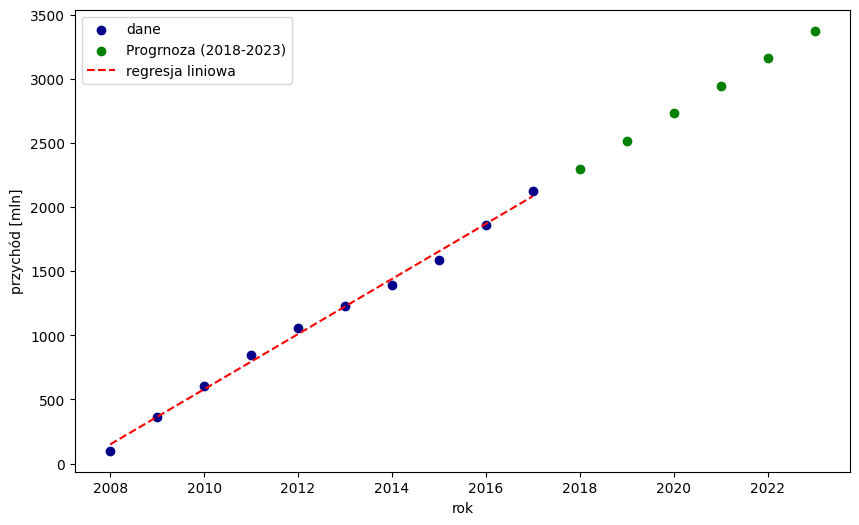


Prognoza użytkowników na lata 2018-2023:
Rok 2018: 2300.07 mln
Rok 2019: 2515.17 mln
Rok 2020: 2730.27 mln
Rok 2021: 2945.38 mln
Rok 2022: 3160.48 mln
Rok 2023: 3375.58 mln
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.995
Method:                 Least Squares   F-statistic:                     1877.
Date:                Fri, 24 Jan 2025   Prob (F-statistic):           8.89e-11
Time:                        19:16:35   Log-Likelihood:                -51.162
No. Observations:                  10   AIC:                             106.3
Df Residuals:                       8   BIC:                             106.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err    

c:\Users\Domin\AppData\Local\Programs\Python\Python313\Lib\site-packages\scipy\stats\_axis_nan_policy.py:418: UserWarning: `kurtosistest` p-value may be inaccurate with fewer than 20 observations; only n=10 observations were given.
  return hypotest_fun_in(*args, **kwds)


In [6]:
x4 = np.array(data["rok"]).reshape(-1,1)
y4 = np.array(data["liczba_uzytkownikow_mln"]).reshape(-1,1)

modelLin4 = LinearRegression()
modelLin4.fit(x4,y4)

y4_pred = modelLin4.predict(x4)

# Prognoza na lata 2018-2023
years_to_predict = np.array([[2018], [2019], [2020], [2021], [2022], [2023]])
y4_pred_future = modelLin4.predict(years_to_predict)

plt.figure(figsize=(10,6))
plt.scatter(x4, y4, color = 'darkblue', label = "dane")
plt.scatter(years_to_predict, y4_pred_future, color = 'green', label = "Progrnoza (2018-2023)")
plt.plot(x4, y4_pred, color = 'red', label = "regresja liniowa", linestyle= "dashed")
plt.xlabel("rok")
plt.ylabel("przychód [mln]")
plt.legend()
plt.show()


# Wyniki prognozy
print("\nPrognoza użytkowników na lata 2018-2023:")
for year, pred in zip(years_to_predict, y4_pred_future):
    print(f"Rok {year[0]}: {pred[0]:.2f} mln")

x4 = sm.add_constant(x4)
model4 = sm.OLS(y4, x4).fit()
print(model4.summary())


### Wczytanie danych dla lat 2018-2020

In [7]:
users2 = pd.read_excel("E://INFORMATYKA//MED//Lab1//dane//users18-20.xlsx")
FBinfo2 = pd.read_excel("E://INFORMATYKA//MED//Lab1//dane//FBinfo18_20.xlsx")

# Przygotowanie danych z drugiej części
users2 = users2[3::4].reset_index(drop=True)  # Wybór tylko Q4
users2 = pd.concat([users, users2], ignore_index=True)  # Połączenie danych z obu plików
FBinfo2 = pd.concat([FBinfo,FBinfo2], ignore_index=True)  # Połączenie danych z obu plików

# Scalanie danych z pierwszej i drugiej części
data2 = FBinfo2.drop(0)
data2 = data2.reset_index(drop=True)

data2["liczba_uzytkownikow_mln"] = users2["liczba_uzytkownikow_mln"] 

data2

,rok,przychod_w_mln,zysk_w_mln,zatrudnienie,liczba_uzytkownikow_mln
0,2008,272,-56,850,100.0
1,2009,777,229,1218,360.0
2,2010,1974,606,2127,608.0
3,2011,3711,1000,3200,845.0
4,2012,5089,53,4619,1056.0
5,2013,7872,1500,6337,1228.0
6,2014,12466,2940,9199,1393.0
7,2015,17928,3688,12691,1591.0
8,2016,27638,10217,17048,1860.0
9,2017,40653,15934,25105,2129.0


### Wykres 4. Zależność przychodów od liczby użytkowników w latach 2008 - 2020

Zoptymalizowane wagi: [0.5 0.5]


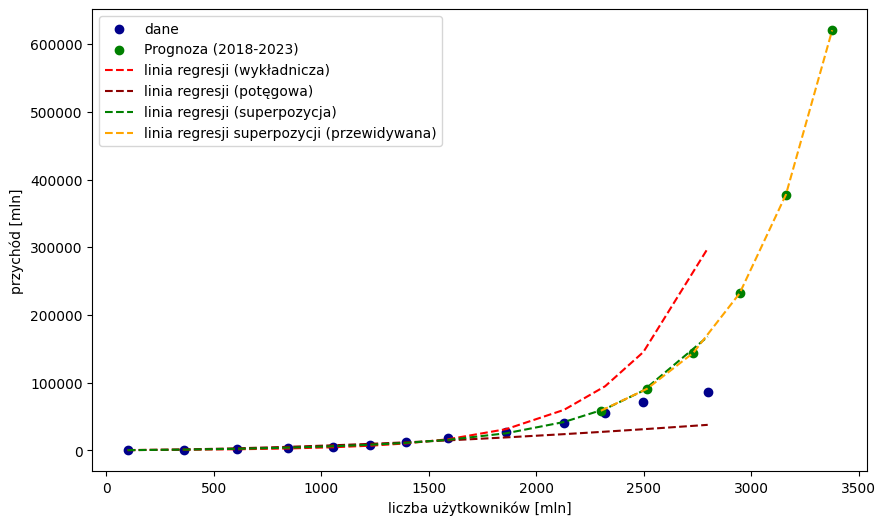

Dane rzeczywiste 2018-2020:
x: 2320.0, y: 55838
x: 2498.0, y: 70697
x: 2797.0, y: 85965

Prognozy 2018-2020:
x: 2300.06666667, y: 58419.93074633744
x: 2515.16969697, y: 90929.24698888458
x: 2730.27272727, y: 144111.71609496823

Różnice między predykcją a danymi rzeczywistymi:
Różnica w x: 19.933333330000096, Różnica w y: -2581.9307463374425
Różnica w x: -17.169696970000132, Różnica w y: -20232.24698888458
Różnica w x: 66.7272727300001, Różnica w y: -58146.71609496823


In [32]:
# Dane wejściowe dla modelu
x5 = np.array(data2["liczba_uzytkownikow_mln"]).reshape(-1,1)
y5 = np.array(data2["przychod_w_mln"]).reshape(-1,1)


y5_pred_log = modelexp1.predict(x5)
y5_pred_exp = np.exp(y5_pred_log)

y5_pred_logpot = modelpotegowy1.predict(np.log(x5))
y5_pred_potegowy = np.exp(y5_pred_logpot)

# Lista przewidywań dla różnych modeli
predictions = [y5_pred_exp, y5_pred_potegowy]

# Obliczanie wag za pomocą optymalizacji
weights_opt = calculate_weights_optimization(y5, predictions)
print("Zoptymalizowane wagi:", weights_opt)

# Finalna prognoza (superpozycja)
y5_pred_fin = sum(w * pred for w, pred in zip(weights_opt, predictions))


# Prognoza wykładnicza dla przyszłych lat
y1_pred_log_future_exp = modelexp1.predict(x_future)
y1_pred_future_exp = np.exp(y1_pred_log_future_exp)

# Prognoza potęgowa dla przyszłych lat
x1_future_log = np.log(x_future)
y1_pred_log_future_pot = modelpotegowy1.predict(x1_future_log)
y1_pred_future_pot = np.exp(y1_pred_log_future_pot)


# Wykres wyników
plt.figure(figsize=(10,6))
plt.scatter(x5, y5, color = 'darkblue', label = "dane")
plt.scatter(x_future, y1_pred_future, color = 'green', label = "Prognoza (2018-2023)")
plt.plot(x5, y5_pred_exp, color = 'red', label = "linia regresji (wykładnicza)", linestyle= "dashed")
plt.plot(x5, y5_pred_potegowy, color = 'darkred', label = "linia regresji (potęgowa)", linestyle= "dashed")
plt.plot(x5, y5_pred_fin, color = 'green', label = "linia regresji (superpozycja)", linestyle= "dashed")
plt.plot(x_future, y1_pred_future, color = 'orange', label = "linia regresji superpozycji (przewidywana)", linestyle= "dashed")
plt.xlabel("liczba użytkowników [mln]")
plt.ylabel("przychód [mln]")
plt.legend()
plt.show()

# Ostatnie 3 punkty z x5 i y5
last_3_x5 = x5[-3:]
last_3_y5 = y5[-3:]

# Pierwsze 3 prognozy z y5_pred_fin
first_3_x_future = x_future[:3]
first_3_y5_pred_fin = y1_pred_future[:3]

# Wypisanie wyników
print("Dane rzeczywiste 2018-2020:")
for i in range(3):
    print(f"x: {last_3_x5[i][0]}, y: {last_3_y5[i][0]}")

print("\nPrognozy 2018-2020:")
for i in range(3):
    print(f"x: {first_3_x_future[i][0]}, y: {first_3_y5_pred_fin[i][0]}")

# Obliczenie różnic
print("\nRóżnice między predykcją a danymi rzeczywistymi:")
for i in range(3):
    diff_x = last_3_x5[i][0] - first_3_x_future[i][0]  # Różnica w x
    diff_y = last_3_y5[i][0] - first_3_y5_pred_fin[i][0]  # Różnica w y
    print(f"Różnica w x: {diff_x}, Różnica w y: {diff_y}")


### Wykres 5. Przychód w latach 2007-2020 wraz z predykcją

In [23]:
# Zaktualizowanie danych (FBinfo2 zawiera dane z lat 2018-2020)
x7 = np.array(FBinfo2["rok"]).reshape(-1,1)  # Zaktualizowane lata
y7 = np.array(FBinfo2["przychod_w_mln"]).reshape(-1,1)  # Zaktualizowane przychody

x7_with_const = sm.add_constant(x7)

# Przewidywanie na podstawie wykładniczego modelu (modelexp3)
y7_pred_log = modelexp3.predict(x7)
y7_pred_exp = np.exp(y7_pred_log)

# Przekształcenie danych do postaci wielomianowej
x7_poly = poly.transform(x7_with_const)
y7_pred_poly = model_poly3.predict(x7_poly)

# Obliczanie wag dla superpozycji
y7_error_exp = np.sum(np.abs(y7 - y7_pred_exp)**2)
y7_error_poly = np.sum(np.abs(y7 - y7_pred_poly)**2)

y7_w1 = (1 / y7_error_exp) / ((1 / y7_error_exp) + (1 / y7_error_poly))
y7_w2 = (1 / y7_error_poly) / ((1 / y7_error_exp) + (1 / y7_error_poly))

# Finalna prognoza (superpozycja)
y7_fin = y7_w1 * y7_pred_exp + y7_w2 * y7_pred_poly

# Prognoza na lata 2018-2023 dla superpozycji
years_to_predict = np.array([[2018], [2019], [2020], [2021], [2022], [2023]])
years_to_predict_with_const = sm.add_constant(years_to_predict)

# Prognoza wykładnicza dla przyszłych lat
y7_pred_log_future = modelexp3.predict(years_to_predict)
y7_pred_exp_future = np.exp(y7_pred_log_future)

# Przekształcenie przyszłych lat do postaci wielomianowej
x7_poly_future = poly.fit_transform(years_to_predict_with_const[:, :model_poly3.n_features_in_])
y7_pred_poly_future = model_poly3.predict(x7_poly_future)

# Finalna prognoza (superpozycja) dla przyszłych lat
y7_pred_fin_future = y7_w1 * y7_pred_exp_future + y7_w2 * y7_pred_poly_future

# Wykres
plt.figure(figsize=(10,6))
plt.scatter(x7, y7, color = 'darkblue', label = "dane")
plt.scatter(years_to_predict, y3_pred_fin_future, color='purple', label="Prognoza (2018-2023)", zorder=5)
plt.plot(years_to_predict, y3_pred_fin_future, color='purple', label="linia regresji (superpozycja)", linestyle="dashed")
plt.plot(x7, y7_pred_exp, color = 'red', label = "linia regresji (wykładnicza)", linestyle= "dashed")
plt.plot(x7, y7_pred_poly, color = 'darkred', label = "linia regresji (wielomianowa)", linestyle= "dashed")
plt.plot(x7, y7_fin, color='green', label="linia regresji (superpozycja)", linestyle="dashed")
plt.plot(years_to_predict, y7_pred_fin_future, color='green', label="linia regresji superpozycji (przewidywana)", linestyle="dashed")
plt.xlabel("rok")
plt.ylabel("przychód [mln]")
plt.legend()
plt.show()

# Ostatnie 3 punkty z x5 i y5
last_3_x7 = x7[-3:]
last_3_y7 = y7[-3:]

# Pierwsze 3 prognozy z y5_pred_fin
first_3_x_future = years_to_predict[:3]
first_3_y7_pred_fin = y7_pred_fin_future[:3]

# Wypisanie wyników
print("Dane rzeczywiste 2018-2020:")
for i in range(3):
    print(f"x: {last_3_x7[i][0]}, y: {last_3_y7[i][0]}")

print("\nPrognozy 2018-2020:")
for i in range(3):
    print(f"x: {first_3_x_future[i][0]}, y: {first_3_y7_pred_fin[i][0]}")

# Obliczenie różnic
print("\nRóżnice między predykcją a danymi rzeczywistymi:")
for i in range(3):
    diff_x = last_3_x7[i][0] - first_3_x_future[i][0]  # Różnica w x
    diff_y = last_3_y7[i][0] - first_3_y7_pred_fin[i][0]  # Różnica w y
    print(f"Różnica w x: {diff_x}, Różnica w y: {diff_y}")


ValueError: X has 6 features, but LinearRegression is expecting 3 features as input.

### Wykres 6. Liczba użytkowników w latach 2008-2020 wraz z predykcją

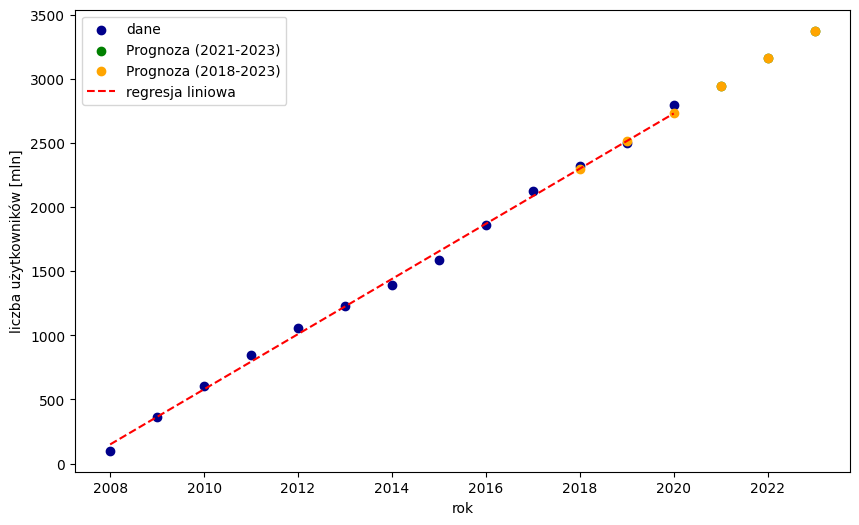


Prognoza użytkowników na lata 2021-2023:
Rok 2018: 2945.38 mln
Rok 2019: 3160.48 mln
Rok 2020: 3375.58 mln

Porównanie prognoz i rzeczywistych wartości (2018–2020):
Rok   Prognoza [mln]      Rzeczywiste [mln]   Różnica [mln]       
2018  2300.07             2320.00             19.93               
2019  2515.17             2498.00             17.17               
2020  2730.27             2797.00             66.73               


In [10]:
# Przygotowanie danych
x8 = np.array(data2["rok"]).reshape(-1,1)
y8 = np.array(data2["liczba_uzytkownikow_mln"]).reshape(-1,1)


y8_pred = modelLin4.predict(x8)

# Prognoza na lata 2018-2023
years_to_predict2 = np.array([[2021], [2022], [2023]])
y8_pred_future = modelLin4.predict(years_to_predict2)

# Wykres
plt.figure(figsize=(10,6))
plt.scatter(x8, y8, color = 'darkblue', label = "dane")
plt.scatter(years_to_predict2, y8_pred_future, color = 'green', label = "Prognoza (2021-2023)")
plt.scatter(years_to_predict, y4_pred_future, color = 'orange', label = "Prognoza (2018-2023)")
plt.plot(x8, y8_pred, color = 'red', label = "regresja liniowa", linestyle= "dashed")
plt.xlabel("rok")
plt.ylabel("liczba użytkowników [mln]")
plt.legend()
plt.show()

# Porówanie wyników predykcji na lata 2018-2020 z danymi rzeczywistymi

# Wyniki prognozy
print("\nPrognoza użytkowników na lata 2021-2023:")
for year, pred in zip(years_to_predict, y8_pred_future):
    print(f"Rok {year[0]}: {pred[0]:.2f} mln")

years_2018_2020 = np.array([[2018], [2019], [2020]])  # Lata do porównania
y4_pred_2018_2020 = modelLin4.predict(years_2018_2020)  # Prognoza z modelu dla 2018–2020
y8_actual_2018_2020 = y8[np.isin(x8.flatten(), years_2018_2020.flatten())]  # Dane rzeczywiste dla 2018–2020

# Wyświetlenie wyników
print("\nPorównanie prognoz i rzeczywistych wartości (2018–2020):")
print(f"{'Rok':<6}{'Prognoza [mln]':<20}{'Rzeczywiste [mln]':<20}{'Różnica [mln]':<20}")
for year, pred, actual in zip(years_2018_2020.flatten(), y4_pred_2018_2020.flatten(), y8_actual_2018_2020.flatten()):
    diff = abs(actual - pred)
    print(f"{year:<6}{pred:<20.2f}{actual:<20.2f}{diff:<20.2f}")



### Wczytanie danych dla lat 2021-2023

In [11]:
users3 = pd.read_excel("E://INFORMATYKA//MED//Lab1//dane//users21-23.xlsx")
FBinfo3 = pd.read_excel("E://INFORMATYKA//MED//Lab1//dane//FBinfo21-23.xlsx")


# # Przygotowanie danych z drugiej części
users3 = users3[3::4].reset_index(drop=True)  # Wybór tylko Q4
users3 = pd.concat([users2, users3], ignore_index=True)  # Połączenie danych z obu plików
FBinfo3 = pd.concat([FBinfo2,FBinfo3], ignore_index=True)  # Połączenie danych z obu plików

# Scalanie danych z pierwszej i drugiej części
data3 = FBinfo3.drop(0)
data3 = data3.reset_index(drop=True)
data3["liczba_uzytkownikow_mln"] = users3["liczba_uzytkownikow_mln"] 

data3

,rok,przychod_w_mln,zysk_w_mln,zatrudnienie,liczba_uzytkownikow_mln
0,2008,272,-56,850,100.0
1,2009,777,229,1218,360.0
2,2010,1974,606,2127,608.0
3,2011,3711,1000,3200,845.0
4,2012,5089,53,4619,1056.0
5,2013,7872,1500,6337,1228.0
6,2014,12466,2940,9199,1393.0
7,2015,17928,3688,12691,1591.0
8,2016,27638,10217,17048,1860.0
9,2017,40653,15934,25105,2129.0


### Wykres 7. Zależność przychodów od liczby użytkowników w latach 2008-2023

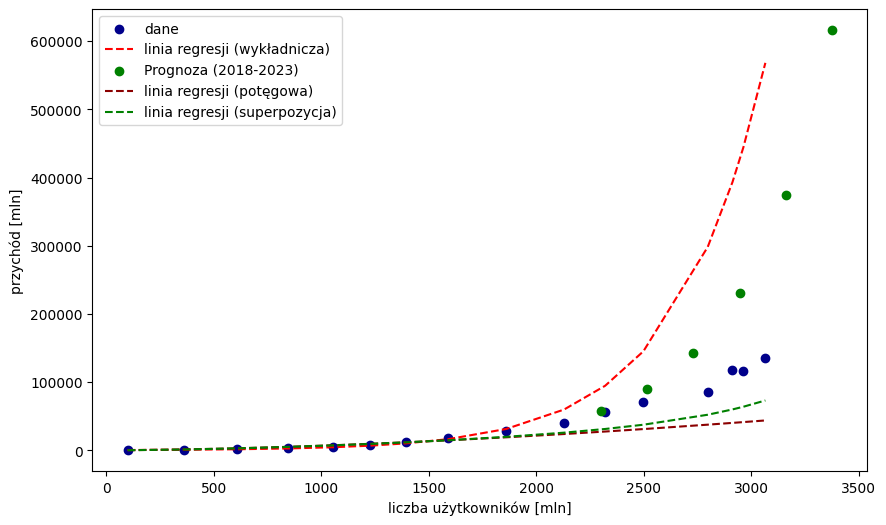

Dane rzeczywiste 2021-2023:
x: 2912.0, y: 117929
x: 2963.0, y: 116609
x: 3065.0, y: 134902

Prognozy 2021-2023:
x: 2945.37575758, y: 230378.42464260777
x: 3160.47878788, y: 374996.62932933046
x: 3375.58181818, y: 615996.5964226546

Różnice między predykcją a danymi rzeczywistymi:
Różnica w x: -33.37575758000003, Różnica w y: -112449.42464260777
Różnica w x: -197.4787878799998, Różnica w y: -258387.62932933046
Różnica w x: -310.58181818, Różnica w y: -481094.5964226546


In [13]:
x9 = np.array(data3["liczba_uzytkownikow_mln"]).reshape(-1,1)
y9 = np.array(data3["przychod_w_mln"]).reshape(-1,1)

y9_log = np.log(y9)
x9_log = np.log(x9)

# model wykładniczy
y9_pred_log = modelexp1.predict(x9)
y9_pred_exp = np.exp(y9_pred_log)


# model potęgowy
y9_pred_logpot = modelpotegowy1.predict(x9_log)
y9_pred_potegowy = np.exp(y9_pred_logpot)


# obliczanie wag dla superpozycji
y9_error_exp = np.sum(np.abs(y9 - y9_pred_exp)**2)
y9_error_pot = np.sum(np.abs(y9 - y9_pred_potegowy)**2)

y9_w1 = (1 / y9_error_exp) / ((1 / y9_error_exp) + (1 / y9_error_pot))
y9_w2 = (1 / y9_error_pot) / ((1 / y9_error_exp) + (1 / y9_error_pot))

# Finalna prognoza
y9_fin = y9_w1 * y9_pred_exp + y9_w2 * y9_pred_potegowy



plt.figure(figsize=(10,6))
plt.scatter(x9, y9, color = 'darkblue', label = "dane")
plt.plot(x9, y9_pred_exp, color = 'red', label = "linia regresji (wykładnicza)", linestyle= "dashed")
plt.scatter(x_future, y1_pred_future, color = 'green', label = "Prognoza (2018-2023)")
plt.plot(x9, y9_pred_potegowy, color = 'darkred', label = "linia regresji (potęgowa)", linestyle= "dashed")
plt.plot(x9, y9_fin, color = 'green', label = "linia regresji (superpozycja)", linestyle= "dashed")
plt.xlabel("liczba użytkowników [mln]")
plt.ylabel("przychód [mln]")
plt.legend()
plt.show()

#różnica między prognozą a danymi rzeczywistymi
last_3_x9 = x9[-3:]
last_3_y9 = y9[-3:]

#wartości przewidywane 2021-2023
last_3_x_future = x_future[-3:]
last_3_y9_pred_fin = y1_pred_future[-3:]

print("Dane rzeczywiste 2021-2023:")
for i in range(3):
    print(f"x: {last_3_x9[i][0]}, y: {last_3_y9[i][0]}")

print("\nPrognozy 2021-2023:")
for i in range(3):
    print(f"x: {last_3_x_future[i][0]}, y: {last_3_y9_pred_fin[i][0]}")

print("\nRóżnice między predykcją a danymi rzeczywistymi:")
for i in range(3):
    diff_x = last_3_x9[i][0] - last_3_x_future[i][0]
    diff_y = last_3_y9[i][0] - last_3_y9_pred_fin[i][0]
    print(f"Różnica w x: {diff_x}, Różnica w y: {diff_y}")



### Wykres 8. Przychód w latach 2007-2023

NameError: name 'y7_pred_fin_future' is not defined

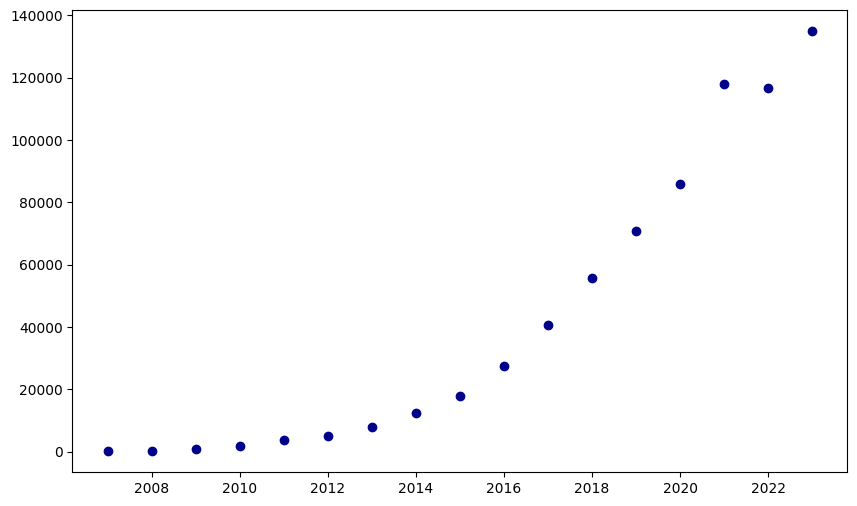

In [14]:
x11 = np.array(FBinfo3["rok"]).reshape(-1,1)
y11 = np.array(FBinfo3["przychod_w_mln"]).reshape(-1,1)

y11_log = np.log(y11)
x11_log = np.log(x11)

y11_pred_log = modelexp3.predict(x11)
y11_pred_exp = np.exp(y11_pred_log)

x11_poly = poly.fit_transform(x11)  # Przekształcamy dane do formy wielomianowej
model_poly3.fit(x11_poly, y11)

y11_pred_poly = model_poly3.predict(x11_poly)

# obliczanie wag dla superpozycji
y11_error_exp = np.sum(np.abs(y11 - y11_pred_exp))
y11_error_pot = np.sum(np.abs(y11 - y11_pred_poly))

y11_w1 = (1 / y11_error_exp) / ((1 / y11_error_exp) + (1 / y11_error_pot))
y11_w2 = (1 / y11_error_pot) / ((1 / y11_error_exp) + (1 / y11_error_pot))

# Finalna prognoza
y11_fin = y11_w1 * y11_pred_exp + y11_w2 * y11_pred_poly

plt.figure(figsize=(10,6))
plt.scatter(x11, y11, color = 'darkblue', label = "dane")
plt.scatter(years_to_predict, y7_pred_fin_future, color='purple', label="Prognoza (2018-2023)", zorder=5)
plt.plot(x11, y11_pred_exp, color = 'red', label = "linia regresji (wykładnicza)", linestyle= "dashed")
plt.plot(x11, y11_pred_poly, color = 'darkred', label = "linia regresji (wielomianowa)", linestyle= "dashed")
plt.plot(x11, y11_fin, color='green', label="linia regresji (superpozycja)", linestyle="dashed")
plt.xlabel("rok")
plt.ylabel("przychód [mln]")
plt.legend()
plt.show()

#różnica między prognozą a danymi rzeczywistymi
last_3_x11 = x11[-3:]
last_3_y11 = y11[-3:]

#wartości przewidywane 2021-2023
last_3_x_future = years_to_predict[-3:]
last_3_y11_pred_fin = y7_pred_fin_future[-3:]

print("Dane rzeczywiste 2021-2023:")
for i in range(3):
    print(f"x: {last_3_x11[i][0]}, y: {last_3_y11[i][0]}")

print("\nPrognozy 2021-2023:")
for i in range(3):
    print(f"x: {last_3_x_future[i][0]}, y: {last_3_y11_pred_fin[i][0]}")

print("\nRóżnice między predykcją a danymi rzeczywistymi:")
for i in range(3):
    diff_x = last_3_x11[i][0] - last_3_x_future[i][0]
    diff_y = last_3_y11[i][0] - last_3_y11_pred_fin[i][0]
    print(f"Różnica w x: {diff_x}, Różnica w y: {diff_y}")

### Wykres 9. Liczba użytkowników w latach 2008-2023

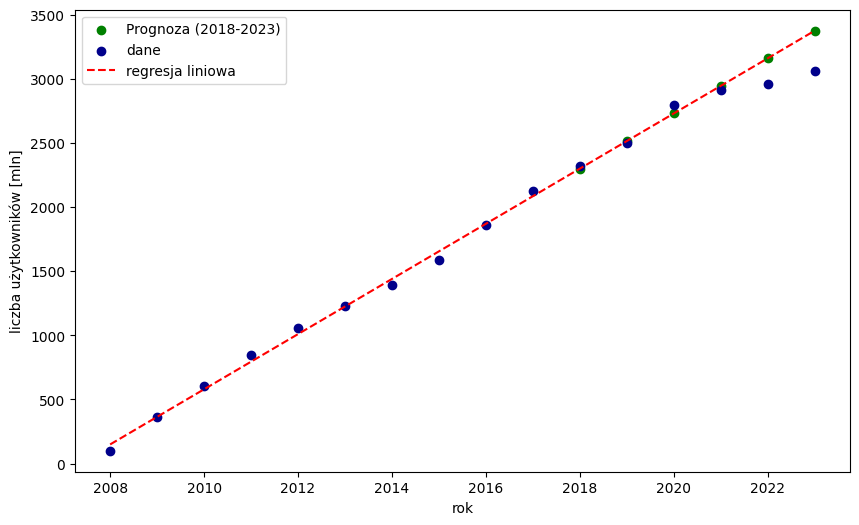

Różnica między prognozą a danymi rzeczywistymi:
Rok 2008: -49.04 mln
Rok 2009: -4.14 mln
Rok 2010: 28.76 mln
Rok 2011: 50.65 mln
Rok 2012: 46.55 mln
Rok 2013: 3.45 mln
Rok 2014: -46.65 mln
Rok 2015: -63.76 mln
Rok 2016: -9.86 mln
Rok 2017: 44.04 mln
Rok 2018: 19.93 mln
Rok 2019: -17.17 mln
Rok 2020: 66.73 mln
Rok 2021: -33.38 mln
Rok 2022: -197.48 mln
Rok 2023: -310.58 mln


In [49]:
x12 = np.array(data3["rok"]).reshape(-1,1)
y12 = np.array(data3["liczba_uzytkownikow_mln"]).reshape(-1,1)

y12_pred = modelLin4.predict(x12)

plt.figure(figsize=(10,6))
plt.scatter(years_to_predict, y4_pred_future, color = 'green', label = "Prognoza (2018-2023)")
plt.scatter(x12, y12, color = 'darkblue', label = "dane")
plt.plot(x12, y12_pred, color = 'red', label = "regresja liniowa", linestyle= "dashed")
plt.xlabel("rok")
plt.ylabel("liczba użytkowników [mln]")
plt.legend()
plt.show()

#Różnica między prognozą a danymi rzeczywistymi
diff = y12 - y12_pred

print("Różnica między prognozą a danymi rzeczywistymi:")
for i in range(len(diff)):
    print(f"Rok {x12[i][0]}: {diff[i][0]:.2f} mln")


## Zadanie 2

#### Wczytanie danych

In [3]:
body_fat=pd.read_csv("C://Users//Domin//Desktop//semestr5//MED//Lab1//LAB1//dane//bodyfat.csv",sep="\t")
body_fat

,Density,Pct.BF,Age,Weight,Height,Neck,Chest,Abdomen,Waist,Hip,Thigh,Knee,Ankle,Bicep,Forearm,Wrist
0,1.0708,12.3,23,154.25,67.75,36.2,93.1,85.2,33.543307,94.5,59.0,37.3,21.9,32.0,27.4,17.1
1,1.0853,6.1,22,173.25,72.25,38.5,93.6,83.0,32.677165,98.7,58.7,37.3,23.4,30.5,28.9,18.2
2,1.0414,25.3,22,154.00,66.25,34.0,95.8,87.9,34.606299,99.2,59.6,38.9,24.0,28.8,25.2,16.6
3,1.0751,10.4,26,184.75,72.25,37.4,101.8,86.4,34.015748,101.2,60.1,37.3,22.8,32.4,29.4,18.2
4,1.0340,28.7,24,184.25,71.25,34.4,97.3,100.0,39.370079,101.9,63.2,42.2,24.0,32.2,27.7,17.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,1.0736,11.0,70,134.25,67.00,34.9,89.2,83.6,32.913386,88.8,49.6,34.8,21.5,25.6,25.7,18.5
246,1.0236,33.6,72,201.00,69.75,40.9,108.5,105.0,41.338583,104.5,59.6,40.8,23.2,35.2,28.6,20.1
247,1.0328,29.3,72,186.75,66.00,38.9,111.1,111.5,43.897638,101.7,60.3,37.3,21.5,31.3,27.2,18.0
248,1.0399,26.0,72,190.75,70.50,38.9,108.3,101.3,39.881890,97.8,56.0,41.6,22.7,30.5,29.4,19.8


array([[<Axes: xlabel='Density', ylabel='Density'>,
        <Axes: xlabel='Pct.BF', ylabel='Density'>,
        <Axes: xlabel='Age', ylabel='Density'>,
        <Axes: xlabel='Weight', ylabel='Density'>,
        <Axes: xlabel='Height', ylabel='Density'>,
        <Axes: xlabel='Neck', ylabel='Density'>,
        <Axes: xlabel='Chest', ylabel='Density'>,
        <Axes: xlabel='Abdomen', ylabel='Density'>,
        <Axes: xlabel='Waist', ylabel='Density'>,
        <Axes: xlabel='Hip', ylabel='Density'>,
        <Axes: xlabel='Thigh', ylabel='Density'>,
        <Axes: xlabel='Knee', ylabel='Density'>,
        <Axes: xlabel='Ankle', ylabel='Density'>,
        <Axes: xlabel='Bicep', ylabel='Density'>,
        <Axes: xlabel='Forearm', ylabel='Density'>,
        <Axes: xlabel='Wrist', ylabel='Density'>],
       [<Axes: xlabel='Density', ylabel='Pct.BF'>,
        <Axes: xlabel='Pct.BF', ylabel='Pct.BF'>,
        <Axes: xlabel='Age', ylabel='Pct.BF'>,
        <Axes: xlabel='Weight', ylabel='Pct.BF'>

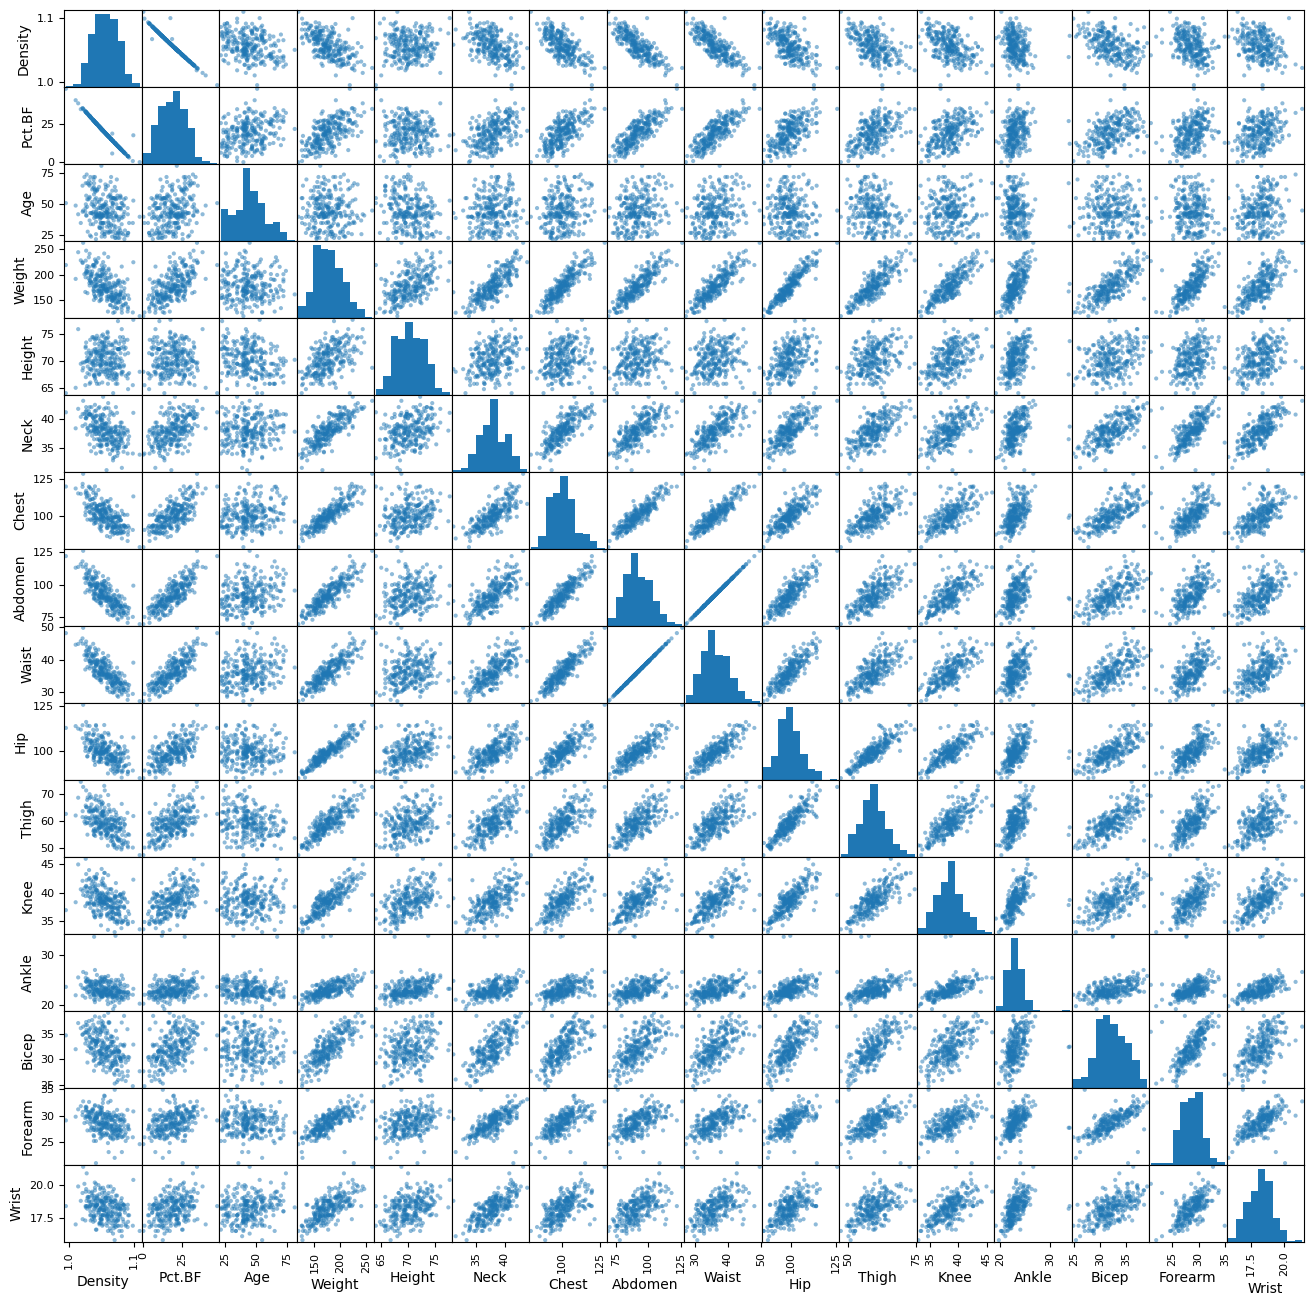

In [139]:
scatter_matrix(body_fat,figsize=(16,16))

### Selekcja najważniejszych zmiennych dla Pct.BF

#### 1. Selekcja wyznaczając współczynnik korelacji

In [6]:
correlation_matrix = body_fat.corr()
corellation = correlation_matrix['Pct.BF'].sort_values(ascending=False)
print(corellation)

Pct.BF     1.000000
Waist      0.823685
Abdomen    0.823685
Chest      0.700670
Hip        0.632675
Weight     0.617299
Thigh      0.548550
Knee       0.492308
Neck       0.488524
Bicep      0.481538
Forearm    0.364709
Wrist      0.339008
Age        0.295051
Ankle      0.244556
Height    -0.029390
Density   -0.987480
Name: Pct.BF, dtype: float64


#### 2. Selekcja metodą eliminacji wstecznej

In [7]:
x = body_fat[['Density', 'Age', 'Weight', 'Neck', 'Chest', 'Abdomen', 'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist']]
y = body_fat['Pct.BF']

x = sm.add_constant(x)

# Stworzenie początkowego modelu
model = sm.OLS(y, x).fit()

# Funkcja do przeprowadzania eliminacji wstecznej
def backward_elimination(x, y, significance_level=0.05):
    while True:
        # Dopasowanie modelu OLS
        model = sm.OLS(y, x).fit()
        # Sprawdzanie wartości p dla każdej zmiennej
        p_values = model.pvalues
        # Jeśli którakolwiek wartość p jest większa niż próg, usuwamy tę zmienną
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_variable = p_values.idxmax()  # Zmienna o największej wartości p
            x = x.drop(columns=[excluded_variable])
            print(f'Usunięto zmienną {excluded_variable} z wartością p = {max_p_value}')
        else:
            break
    return x, model

# Uruchomienie eliminacji wstecznej
x_selected, final_model = backward_elimination(x, y)

# Wyświetlenie podsumowania końcowego modelu
print(final_model.summary())

Usunięto zmienną Wrist z wartością p = 0.8983701168121638
Usunięto zmienną Forearm z wartością p = 0.8603526947131195
Usunięto zmienną Neck z wartością p = 0.7960856130520939
Usunięto zmienną Knee z wartością p = 0.779612632606011
Usunięto zmienną Waist z wartością p = 0.6468018437930456
Usunięto zmienną Thigh z wartością p = 0.5993862960505081
Usunięto zmienną Hip z wartością p = 0.617741270721115
Usunięto zmienną Chest z wartością p = 0.4150693354882359
Usunięto zmienną Bicep z wartością p = 0.24868589736629404
Usunięto zmienną Weight z wartością p = 0.2684098056048616
Usunięto zmienną Ankle z wartością p = 0.327803688583466
Usunięto zmienną Age z wartością p = 0.07373728693874548
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.977
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                   

### Wykres 10. Porównanie rzeczywistego i przewidywanego bodyfatu

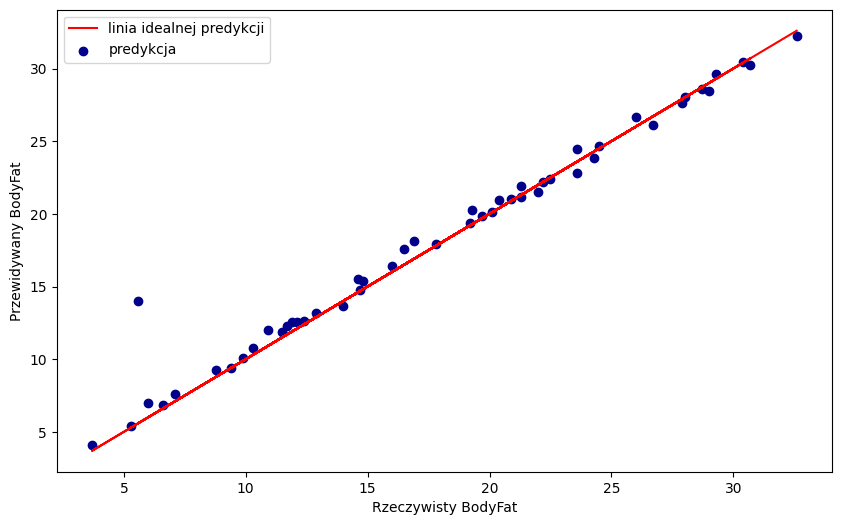

Średni błąd kwadratowy: 1.6781890421365162
R^2: 0.971911958190546
                            OLS Regression Results                            
Dep. Variable:                 Pct.BF   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.977
Method:                 Least Squares   F-statistic:                     4302.
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          2.94e-163
Time:                        14:04:31   Log-Likelihood:                -329.14
No. Observations:                 200   AIC:                             664.3
Df Residuals:                     197   BIC:                             674.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------

In [10]:
x = body_fat[['Density', 'Abdomen']]
y = body_fat['Pct.BF']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test)

model = LinearRegression()
model.fit(x_train_scaled, y_train)

y_pred = model.predict(x_test_scaled)

plt.figure(figsize=(10,6))
plt.plot(y_test, y_test, color = 'red', label = "linia idealnej predykcji")
plt.scatter(y_test, y_pred, color = 'darkblue', label = "predykcja")
plt.xlabel('Rzeczywisty BodyFat')
plt.ylabel('Przewidywany BodyFat')
plt.legend()
plt.show()

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Średni błąd kwadratowy: {mse}")
print(f"R^2: {r2}")

#OLS 
x = sm.add_constant(x_train_scaled)
model = sm.OLS(y_train, x).fit()
print(model.summary())

### Selekcja najważniejszych zmiennych dla Weight

#### 1. Selekcja wyznaczając współczynnik korelacji

In [4]:
correlation_matrix = body_fat.corr()
corellation = correlation_matrix['Weight'].sort_values(ascending=False)
print(corellation)

Weight     1.000000
Hip        0.932691
Chest      0.891286
Abdomen    0.873735
Waist      0.873735
Thigh      0.852116
Knee       0.842744
Neck       0.810014
Bicep      0.785214
Wrist      0.725104
Forearm    0.683333
Pct.BF     0.617299
Ankle      0.580906
Height     0.512913
Age       -0.016055
Density   -0.598372
Name: Weight, dtype: float64


#### 2. Selekcja metodą eliminacji wstecznej

In [196]:
x = body_fat[['Density', 'Age', 'Pct.BF', 'Neck', 'Chest', 'Abdomen', 'Waist', 'Hip', 'Thigh', 'Knee', 'Ankle', 'Bicep', 'Forearm', 'Wrist']]
y = body_fat['Weight']

# Dodajemy stałą do X (konieczne dla statystyk regresji)
x = sm.add_constant(x)

# Stworzenie początkowego modelu
model = sm.OLS(y, x).fit()

# Funkcja do przeprowadzania eliminacji wstecznej
def backward_elimination(x, y, significance_level=0.05):
    while True:
        # Dopasowanie modelu OLS
        model = sm.OLS(y, x).fit()
        # Sprawdzanie wartości p dla każdej zmiennej
        p_values = model.pvalues
        # Jeśli którakolwiek wartość p jest większa niż próg, usuwamy tę zmienną
        max_p_value = p_values.max()
        if max_p_value > significance_level:
            excluded_variable = p_values.idxmax()  # Zmienna o największej wartości p
            x = x.drop(columns=[excluded_variable])
            print(f'Usunięto zmienną {excluded_variable} z wartością p = {max_p_value}')
        else:
            break
    return x, model

# Uruchomienie eliminacji wstecznej
x_selected, final_model = backward_elimination(x, y)

# Wyświetlenie podsumowania końcowego modelu
print(final_model.summary())

Usunięto zmienną Thigh z wartością p = 0.9437047236155901
Usunięto zmienną Abdomen z wartością p = 0.5994339051609803
Usunięto zmienną Pct.BF z wartością p = 0.429334165748399
Usunięto zmienną Forearm z wartością p = 0.2272091732600837
Usunięto zmienną Density z wartością p = 0.06484707414218957
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     599.5
Date:                Sun, 08 Dec 2024   Prob (F-statistic):          4.87e-159
Time:                        22:48:03   Log-Likelihood:                -784.00
No. Observations:                 250   AIC:                             1588.
Df Residuals:                     240   BIC:                             1623.
Df Model:                           9                                  

### Wykres 11. Porówanie rzeczywistej i przewidywanej wagi

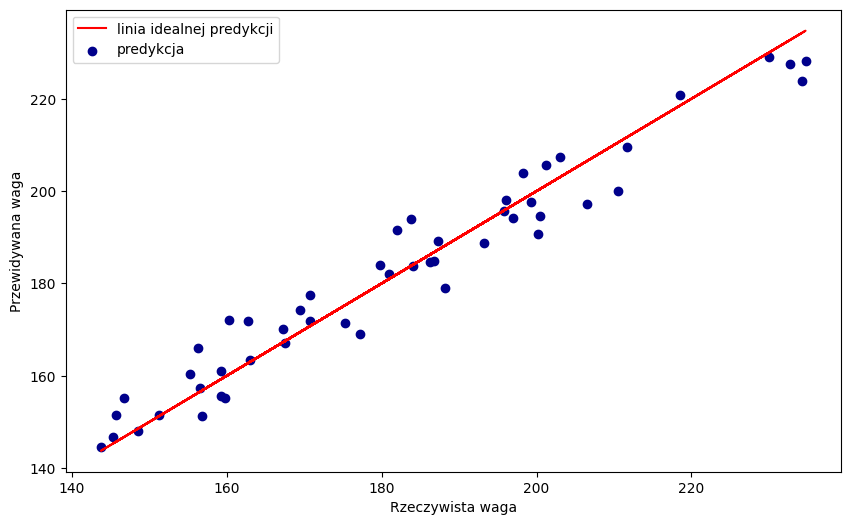

Średni błąd kwadratowy: 32.207164765754094
R^2: 0.9474927051870407
                            OLS Regression Results                            
Dep. Variable:                 Weight   R-squared:                       0.958
Model:                            OLS   Adj. R-squared:                  0.956
Method:                 Least Squares   F-statistic:                     487.1
Date:                Sun, 12 Jan 2025   Prob (F-statistic):          3.80e-126
Time:                        14:20:33   Log-Likelihood:                -627.98
No. Observations:                 200   AIC:                             1276.
Df Residuals:                     190   BIC:                             1309.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

In [7]:
xw = body_fat[['Age', 'Neck', 'Chest', 'Waist', 'Hip', 'Knee', 'Ankle', 'Bicep', 'Wrist']]
yw = body_fat['Weight']

xw_train, xw_test, yw_train, yw_test = train_test_split(xw, yw, test_size=0.2, random_state=42)

scalerw = StandardScaler()
xw_train_scaled = scalerw.fit_transform(xw_train)
xw_test_scaled = scalerw.transform(xw_test)

modelw = LinearRegression()
modelw.fit(xw_train_scaled, yw_train)

yw_pred = modelw.predict(xw_test_scaled)

plt.figure(figsize=(10,6))
plt.plot(yw_test, yw_test, color = 'red', label = "linia idealnej predykcji")
plt.scatter(yw_test, yw_pred, color = 'darkblue', label = "predykcja")
plt.xlabel('Rzeczywista waga')
plt.ylabel('Przewidywana waga')
plt.legend()
plt.show()

msew = mean_squared_error(yw_test, yw_pred)
r2w = r2_score(yw_test, yw_pred)
print(f"Średni błąd kwadratowy: {msew}")
print(f"R^2: {r2w}")

#OLS    
xw = sm.add_constant(xw_train_scaled)
modelw = sm.OLS(yw_train, xw).fit()
print(modelw.summary())